<a href="https://colab.research.google.com/github/Avnish3909/trump-tweets-sentiment-analysis/blob/main/Trump_Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install nltk

In [63]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("words")
nltk.download('treebank')
nltk.download('stopwords')
nltk.download("maxent_ne_chunker")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [5]:
!wget https://www.dropbox.com/s/v0gmlmnxiqt1vga/Donald-Tweets%21.csv

--2023-11-12 09:14:38--  https://www.dropbox.com/s/v0gmlmnxiqt1vga/Donald-Tweets%21.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/v0gmlmnxiqt1vga/Donald-Tweets%21.csv [following]
--2023-11-12 09:14:38--  https://www.dropbox.com/s/raw/v0gmlmnxiqt1vga/Donald-Tweets%21.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d07da943685ff594553695d50.dl.dropboxusercontent.com/cd/0/inline/CHYaprkNtNVrXPZR-npP-XLnd8tyj_gXcaRR3CfvRlxIxNitJN3AEjmFsoZwOQRgRI7Dq7vffB9AVirfKvkG-jdKmfO-VGE-4P_3caRlAHgtrpoZPkCRPOH_PRQaJ3UDhg4iLpnDDyLaklpIK-y27jOs/file# [following]
--2023-11-12 09:14:39--  https://uc3d07da943685ff594553695d50.dl.dropboxusercontent.com/cd/0/inline/CHYaprkNtNVrXPZR-npP-XLnd8tyj_gXcaRR3CfvRlxIxNitJN3AEjmFsoZwOQRgRI7Dq7vffB9AVi

In [6]:
tweet = pd.read_csv("Donald-Tweets!.csv")
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN


In [7]:
tweet.drop(columns=["Unnamed: 10","Unnamed: 11"], inplace = True)
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688


In [8]:
tweet_by_date=tweet.copy()
tweet_by_date["Date"]=pd.to_datetime(tweet["Date"],yearfirst=True)
tweet_by_date["Date"]=tweet_by_date["Date"].dt.month
tweet_by_date=pd.DataFrame(tweet_by_date.groupby(["Date"]).size().sort_values(ascending=True).rename("Tweets"))

In [9]:
tweet_by_date


,Tweets
Date,
6,258
4,287
5,357
3,456
1,507
2,516
12,579
11,709
8,726


In [10]:
import string,re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [11]:
def clean_text(tweet):
  tweet=word_tokenize(tweet)
  tweet=tweet[4:]
  tweet=" ".join(tweet)
  tweet=re.sub("https","",tweet)
  tweet=[char for char in tweet if char not in string.punctuation]
  tweet="".join(tweet)
  tweet=[word for word in tweet.split() if word.lower() not in stopwords.words("english")]
  return " ".join(tweet)

In [12]:
tweet["cleaned_text"]=tweet["Tweet_Text"].apply(clean_text)

In [13]:
tweet["cleaned_text"]

0       deepest gratitude served armed forces ThankAVe...
1       New York soon making important decisions peopl...
2       small groups protesters last night passion gre...
3       open successful presidential election professi...
4       DC Met President Obama first time Really good ...
                              ...                        
7370    atheist Penn pennjillette Apprentice never cha...
7371    show Broadway terrible surprised boring guy Pe...
7372    sweats shakes nervously FoxNews talks bull zer...
7373    Donald Trump one sexiest men planet Every woma...
7374            Trump Rove clown loser http tcojfDKiaTJeN
Name: cleaned_text, Length: 7375, dtype: object

In [14]:
feature = tweet["cleaned_text"]
processed_features = []

for sentence in range(0, len(feature)):
    processed_feature = re.sub(r"\W", " ", str(feature[sentence]))
    processed_feature = re.sub(r"\s+[a-zA-Z]\s+", " ", processed_feature)
    processed_feature = re.sub(r"^[a-zA-Z]\s+", " ", processed_feature)
    processed_feature = re.sub(r"\s+", " ", processed_feature, flags=re.I)
    processed_feature = processed_feature.lower()
    processed_features.append(processed_feature)

In [15]:
processed_features[:5]

['deepest gratitude served armed forces thankavet tcowpk7qwpk8z',
 'new york soon making important decisions people running government',
 'small groups protesters last night passion great country come together proud',
 'open successful presidential election professional protesters incited media protesting unfair',
 'dc met president obama first time really good meeting great chemistry melania liked mrs lot']

In [16]:
tweet["processed_text"]=processed_features

In [17]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...


In [18]:
processed_text_ngram=list(nltk.ngrams(tweet["processed_text"],8))

In [19]:
processed_text_ngram[:3]

[('deepest gratitude served armed forces thankavet tcowpk7qwpk8z',
  'new york soon making important decisions people running government',
  'small groups protesters last night passion great country come together proud',
  'open successful presidential election professional protesters incited media protesting unfair',
  'dc met president obama first time really good meeting great chemistry melania liked mrs lot',
  'us marine corps thank service tcolz2dhrxzo4',
  'important evening forgotten man woman never forgotten come together never',
  '945pm electionnight maga tcohfujerzbod'),
 ('new york soon making important decisions people running government',
  'small groups protesters last night passion great country come together proud',
  'open successful presidential election professional protesters incited media protesting unfair',
  'dc met president obama first time really good meeting great chemistry melania liked mrs lot',
  'us marine corps thank service tcolz2dhrxzo4',
  'importan

In [20]:
from nltk.stem.porter import PorterStemmer
def get_stemmed_text(corpus):
  stemmer=PorterStemmer()
  return [" ".join([stemmer.stem(word) for word in review.split()]) for review in corpus]

tweet["stemmedtext(porter)"] = get_stemmed_text(tweet["processed_text"])

In [21]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter)
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...


In [22]:
from nltk.stem import LancasterStemmer
def get_stemmed_text(corpus):
  stemmer=LancasterStemmer()
  return [" ".join([stemmer.stem(word) for word in review.split()]) for review in corpus]

tweet["stemmedtext(lancaster)"] = get_stemmed_text(tweet["processed_text"])

In [23]:
from nltk.stem import SnowballStemmer
def get_stemmed_text(corpus):
  stemmer=SnowballStemmer("english")
  return [" ".join([stemmer.stem(word) for word in review.split()]) for review in corpus]

tweet["stemmedtext(snowball)"] = get_stemmed_text(tweet["processed_text"])

In [24]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball)
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...


In [25]:
from nltk.stem import WordNetLemmatizer
def get_lemetized_text(corpus):
  lemmatizer=WordNetLemmatizer()
  return [" ".join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

tweet["lemmatext"] = get_lemetized_text(tweet["processed_text"])

In [26]:
tweet.head(2)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...


In [27]:
tweet["lemma_str"]=[" ".join(map(str,l)) for l in tweet["lemmatext"]]
tweet.head(2)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...


In [28]:
tweet["word_count"]=tweet["lemmatext"].apply(lambda x: len(str(x).split()))
tweet["review_len"]=tweet["lemma_str"].astype(str).apply(len)
tweet.head(2)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129


In [29]:
from textblob import TextBlob
def generate_polarity(text):
  sentiment=TextBlob(text).sentiment
  return sentiment

In [30]:
sentiment = tweet["lemmatext"].apply(generate_polarity)
sentiment=sentiment.to_frame()
sentiment.head()

,lemmatext
0,"(0.0, 0.0)"
1,"(0.2681818181818182, 0.7272727272727273)"
2,"(0.3375, 0.5541666666666667)"
3,"(0.0875, 0.6375)"
4,"(0.5875, 0.6208333333333333)"


In [31]:
tweet["sentiment_score"]=sentiment
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,"(0.0, 0.0)"
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,"(0.2681818181818182, 0.7272727272727273)"
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,"(0.3375, 0.5541666666666667)"
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,"(0.0875, 0.6375)"
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,"(0.5875, 0.6208333333333333)"


In [32]:
sentiment["polarity"]=sentiment["lemmatext"].apply(lambda x:x[0])


In [33]:
tweet["polarity"]=sentiment["polarity"]
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,...,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score,polarity
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,"(0.0, 0.0)",0.000000
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,"(0.2681818181818182, 0.7272727272727273)",0.268182
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,"(0.3375, 0.5541666666666667)",0.337500
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,"(0.0875, 0.6375)",0.087500
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,"(0.5875, 0.6208333333333333)",0.587500


<function matplotlib.pyplot.show(close=None, block=None)>

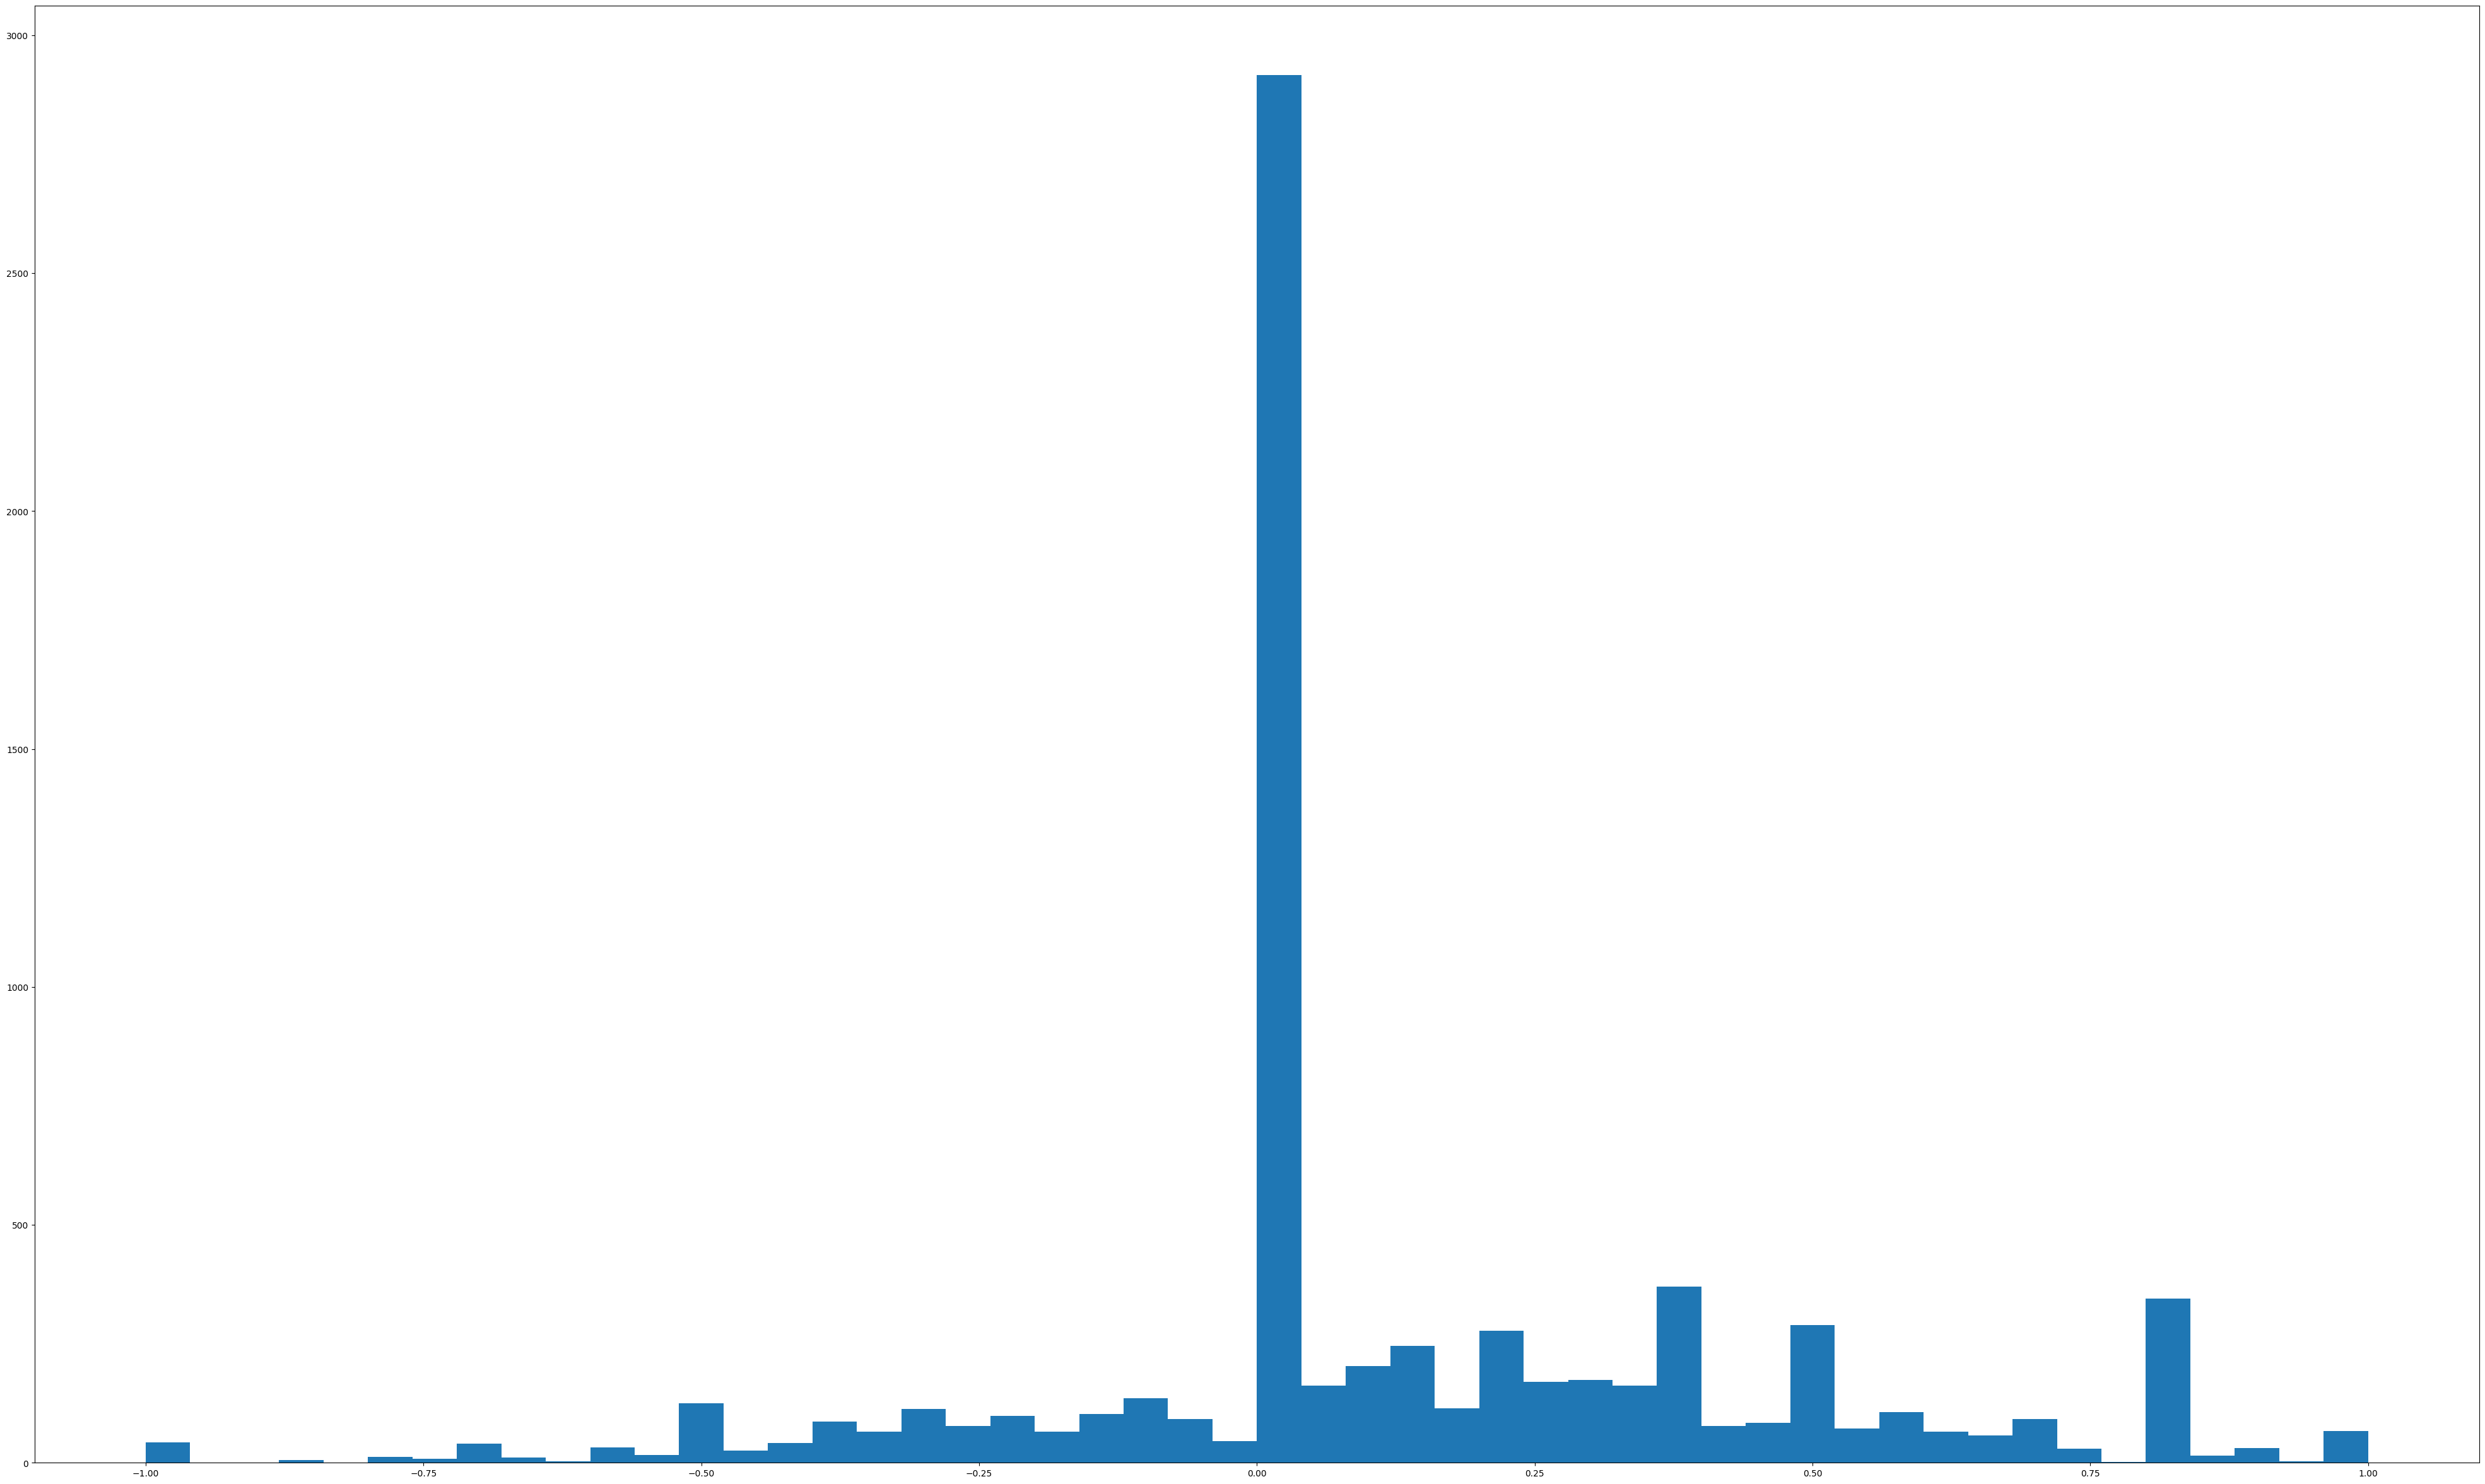

In [34]:
plt.figure(figsize=(50,30))
plt.hist(tweet["polarity"],bins=50)
plt.show

In [35]:
tweet["polarity_encoded"]=["postive" if x > 0 else "negative" if x < 0 else "neutral" for x in tweet["polarity"]]

In [36]:
tweet["polarity_encoded"].value_counts()

postive     3278
neutral     2851
negative    1246
Name: polarity_encoded, dtype: int64

In [37]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,...,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score,polarity,polarity_encoded
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,"(0.0, 0.0)",0.000000,neutral
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,"(0.2681818181818182, 0.7272727272727273)",0.268182,postive
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,"(0.3375, 0.5541666666666667)",0.337500,postive
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,"(0.0875, 0.6375)",0.087500,postive
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,"(0.5875, 0.6208333333333333)",0.587500,postive


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1,1),stop_words="english")


In [43]:
X=tweet["processed_text"]
Y=tweet["polarity_encoded"]

In [46]:
X_vect=vectorizer.fit_transform(X)
df_vect=pd.DataFrame(X_vect.toarray(),columns=vectorizer.get_feature_names_out())
print(df_vect.head())
print(df_vect.shape)

    00  007llisav  00patriot   08  08102015   09   10  100  1000  10000  ...  \
0  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
1  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
2  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
3  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
4  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   

   zogby  zone  zones  zucker  zuckerman  zuckermans  ωtime   ԍԍ  ԏԏԏ   լլ  
0    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
1    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
2    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
3    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
4    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  

[5 rows x 11765 columns]
(7375, 11765)


In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_vect, Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5900, 11765)
(1475, 11765)
(5900,)
(1475,)


In [50]:
del X_vect
del df_vect

In [54]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models=[]
models.append(("knn", KNeighborsClassifier()))
models.append(("logisctic_regression", LogisticRegression()))
models.append(("Random Forest", RandomForestClassifier()))

for name, model in models:
  kfold=KFold(n_splits=5)
  cross_val_scor=cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kfold)
  print("{} : acc: {} (Standard Deviation: {})".format(name, cross_val_scor.mean(), cross_val_scor.std()))

knn : acc: 0.3961016949152542 (Standard Deviation: 0.01012135500124313)
logisctic_regression : acc: 0.788135593220339 (Standard Deviation: 0.010420627897586045)
Random Forest : acc: 0.8237288135593221 (Standard Deviation: 0.00862576993220301)


In [58]:
print("the most positive tweet is : ", tweet.iloc[tweet["polarity"].idxmax()]["Tweet_Text"])
print("the most negative tweet is : ", tweet.iloc[tweet["polarity"].idxmin()]["Tweet_Text"])

the most positive tweet is :  I agree Mike - thank you to all of our law enforcement officers! #VPDebate

"Police officers are the best of us..."
@Mike_Pence
the most negative tweet is :  Hillary is too weak to lead on border security-no solutions, no ideas, no credibility.She supported NAFTA, worst deal in US history. #Debate


In [59]:
sent=tweet.iloc[tweet["polarity"].idxmax()]["processed_text"]
sent_tokens=word_tokenize(sent)

In [60]:
sent_tokens

['thank',
 'law',
 'enforcement',
 'officers',
 'vpdebate',
 'police',
 'officers',
 'best',
 'us',
 'mikepence']

In [61]:
for token in sent_tokens:
  print(nltk.pos_tag([token]))


[('thank', 'NN')]
[('law', 'NN')]
[('enforcement', 'NN')]
[('officers', 'NNS')]
[('vpdebate', 'NN')]
[('police', 'NNS')]
[('officers', 'NNS')]
[('best', 'JJS')]
[('us', 'PRP')]
[('mikepence', 'NN')]


In [64]:
pos_tags = set(tag for word, tag in nltk.corpus.treebank.tagged_words())

print(sorted(pos_tags))

['#', '$', "''", ',', '-LRB-', '-NONE-', '-RRB-', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``']


In [66]:
sent=tweet.iloc[tweet["polarity"].idxmin()]["processed_text"]
sent_tokens=word_tokenize(sent)
for token in sent_tokens:
  print(nltk.pos_tag([token]))


[('lead', 'NN')]
[('border', 'NN')]
[('securityno', 'NN')]
[('solutions', 'NNS')]
[('ideas', 'NNS')]
[('credibilityshe', 'NN')]
[('supported', 'VBN')]
[('nafta', 'NN')]
[('worst', 'JJS')]
[('deal', 'NN')]
[('us', 'PRP')]
[('history', 'NN')]
[('debate', 'NN')]


In [69]:
from nltk import ne_chunk
ne_sent=tweet.iloc[tweet["polarity"].idxmax()]["processed_text"]
ne_tokens=word_tokenize(ne_sent)
ne_tags=nltk.pos_tag(ne_tokens)
ne_ner=ne_chunk(ne_tags)
print(ne_ner)

(S
  thank/NN
  law/NN
  enforcement/NN
  officers/NNS
  vpdebate/VBP
  police/NNS
  officers/NNS
  best/VBP
  us/PRP
  mikepence/NN)


In [72]:
print(doc)

thank law enforcement officers vpdebate police officers best us mikepence


In [74]:
!spacy download en_core_web_sm



2023-11-12 10:46:02.428925: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 10:46:02.428997: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 10:46:02.429051: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 10:46:03.878106: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [87]:
import spacy

nlp = spacy.load("en_core_web_sm")  # Load the English NER model

text = "Apple Inc. is a technology company based in Cupertino, California."
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)


Apple Inc. ORG
Cupertino GPE
California GPE


In [84]:
doc

thank law enforcement officers vpdebate police officers best us mikepence